In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_grad_norms(all_grad_norms, good_or_bad):
    """
    Plots mean gradient norm trajectories with standard deviation shadows
    for Good vs Bad convergence groups.
    """

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    
    # Define colors for good and bad
    colors = {'Good': '#2E8B57', 'Bad': '#DC143C'}  # Green for good, Red for bad
    
    # Separate grad norms by good/bad labels
    good_norms = []
    bad_norms = []
    
    for norms, gob in zip(all_grad_norms, good_or_bad):
        if gob == "Good" or gob == True:
            good_norms.append(norms)
        else:
            bad_norms.append(norms)
    
    # Plot for each group
    for group_name, group_norms in [("Good", good_norms), ("Bad", bad_norms)]:
        if len(group_norms) == 0:
            continue
            
        # Convert to numpy array for easier computation
        group_array = np.array(group_norms)
        
        # Compute mean and std across models (axis=0)
        mean_norms = np.mean(group_array, axis=0)
        std_norms = np.std(group_array, axis=0)
        
        # Create x-axis (mini-batch indices)
        x = np.arange(len(mean_norms))
        
        # Plot mean line
        plt.plot(x, mean_norms, color=colors[group_name], 
                label=f"{group_name} (n={len(group_norms)})", 
                linewidth=2.0)
        
        # Add standard deviation shadow
        plt.fill_between(x, 
                        mean_norms - std_norms, 
                        mean_norms + std_norms, 
                        color=colors[group_name], 
                        alpha=0.2)
    
    plt.xlabel("Mini-batch Index", fontsize=12)
    plt.ylabel("Gradient Norm", fontsize=12)
    plt.title("Gradient Norm per Mini-batch in First Epoch", fontsize=14)
    plt.legend(title="Convergence Quality", fontsize=10, title_fontsize=11, loc="best")
    plt.grid(True, alpha=0.75, linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [8]:
import torch

results = torch.load("../datasets/grad_norms_exp_results.pt", weights_only=False)
print(results.keys())
print(len(results[list(results.keys())[0]]))

dict_keys(['grad_norms', 'metrics'])
10


In [13]:
good_or_bad_labels = []

for res in results["metrics"]:
    if res["accuracy_sum"] > 0.7:
        # label as good convergence
        good_or_bad_labels.append("Good")
    else:
        # label as bad convergence
        good_or_bad_labels.append("Bad")

assert len(good_or_bad_labels) == len(results["grad_norms"]), "Mismatch in lengths of labels and grad norms"

In [14]:
print(good_or_bad_labels)

['Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good']


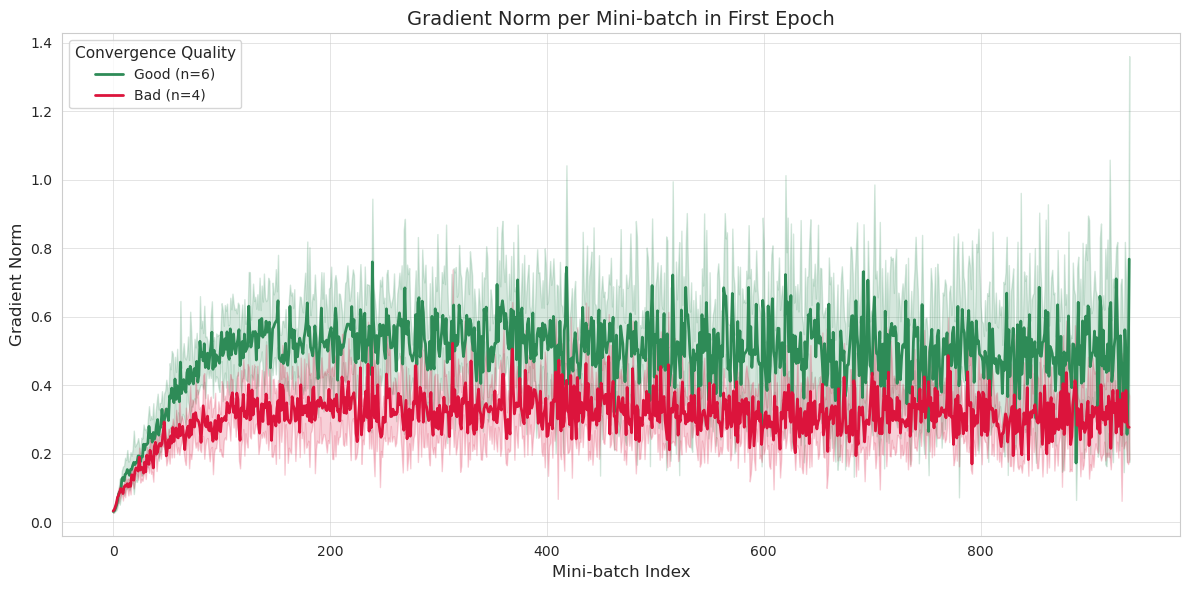

In [39]:
plot_grad_norms(results['grad_norms'], good_or_bad_labels)